In [3]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn 


In [4]:
table = pd.read_excel('Rh_relatorio.xlsx')
display(table)

,nível_de_satisfação,última_avaliação,número_projeto,média_de_horas_mensais,tempo_de_empresa,Acidente de trabalho,status,promocao_ultimos_cinco_anos,Departamento,Salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nível_de_satisfação          14999 non-null  float64
 1   última_avaliação             14999 non-null  float64
 2   número_projeto               14999 non-null  int64  
 3   média_de_horas_mensais       14999 non-null  int64  
 4   tempo_de_empresa             14999 non-null  int64  
 5   Acidente de trabalho         14999 non-null  int64  
 6   status                       14999 non-null  int64  
 7   promocao_ultimos_cinco_anos  14999 non-null  int64  
 8   Departamento                 14999 non-null  object 
 9   Salario                      14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
grau_satisfacao = table.groupby('status')['nível_de_satisfação'].mean().reset_index()
display(grau_satisfacao)

,status,nível_de_satisfação
0,0,0.666810
1,1,0.440098


In [7]:
nvl_atividade = table.groupby('status')['tempo_de_empresa'].count().reset_index()
display(nvl_atividade)

,status,tempo_de_empresa
0,0,11428
1,1,3571


In [8]:
saida_funcionarios = table.groupby('Departamento')['status'].value_counts().unstack()
display(saida_funcionarios)


status,0,1
Departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [9]:
saida_funcionarios = table.pivot_table(
    index='Departamento',      # linhas
    columns='status',          # colunas (0 ou 1)
    values='Salario',          # qualquer coluna numérica (só serve como referência)
    aggfunc='count'            # queremos contar quantos
).fillna(0)

display(saida_funcionarios)


status,0,1
Departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [10]:
contagem = table.groupby('Departamento')['status'].value_counts().unstack().fillna(0)

contagem['%_saida'] = (contagem[0] / (contagem[0] + contagem[1])) * 100

display(contagem[['%_saida']])


status,%_saida
Departamento,
IT,77.750611
RandD,84.625159
accounting,73.402868
hr,70.906631
management,85.555556
marketing,76.340326
product_mng,78.048780
sales,75.507246
support,75.100942


In [11]:
contagem = table.groupby('Departamento')['status'].value_counts().unstack().fillna(0)

contagem['%_ativos'] = (contagem[1] / (contagem[1] + contagem[0])) * 100

display(contagem[['%_ativos']])

status,%_ativos
Departamento,
IT,22.249389
RandD,15.374841
accounting,26.597132
hr,29.093369
management,14.444444
marketing,23.659674
product_mng,21.951220
sales,24.492754
support,24.899058


In [12]:
display(table['Salario'].unique())


array(['low', 'medium', 'high'], dtype=object)

In [13]:
salario_departamento = table.groupby(['Departamento', 'Salario']).size().unstack().fillna(0)
salario_percentual = salario_departamento.div(salario_departamento.sum(axis=1), axis=0) * 100
salario_percentual = salario_percentual.round(2)
display(salario_percentual)



Salario,high,low,medium
Departamento,,,
IT,6.76,49.63,43.60
RandD,6.48,46.25,47.27
accounting,9.65,46.68,43.68
hr,6.09,45.33,48.58
management,35.71,28.57,35.71
marketing,9.32,46.85,43.82
product_mng,7.54,50.00,42.46
sales,6.50,50.70,42.80
support,6.33,51.41,42.26


In [14]:
# Cálculo da média percentual de cada faixa salarial (por coluna)
media_por_faixa = salario_percentual.mean()
display(media_por_faixa.round(2))


Salario
high      10.18
low       46.59
medium    43.24
dtype: float64

In [15]:
# Agrupamento por departamento e faixa salarial
salario_departamento = table.groupby(['Departamento', 'Salario']).size().unstack().fillna(0)

# Cálculo do percentual de cada faixa salarial dentro de cada departamento
salario_percentual = salario_departamento.div(salario_departamento.sum(axis=1), axis=0) * 100
salario_percentual = salario_percentual.round(2)

display(salario_percentual)


Salario,high,low,medium
Departamento,,,
IT,6.76,49.63,43.60
RandD,6.48,46.25,47.27
accounting,9.65,46.68,43.68
hr,6.09,45.33,48.58
management,35.71,28.57,35.71
marketing,9.32,46.85,43.82
product_mng,7.54,50.00,42.46
sales,6.50,50.70,42.80
support,6.33,51.41,42.26


.groupby(['Departamento', 'Salario']) → agrupa pela combinação das duas colunas.

.size() → conta quantos funcionários existem em cada grupo.

.unstack() → transforma os valores de Salario em colunas.

.div(..., axis=0) → divide cada linha pela soma da linha inteira (total de funcionários no departamento).

* 100 → transforma em porcentagem.



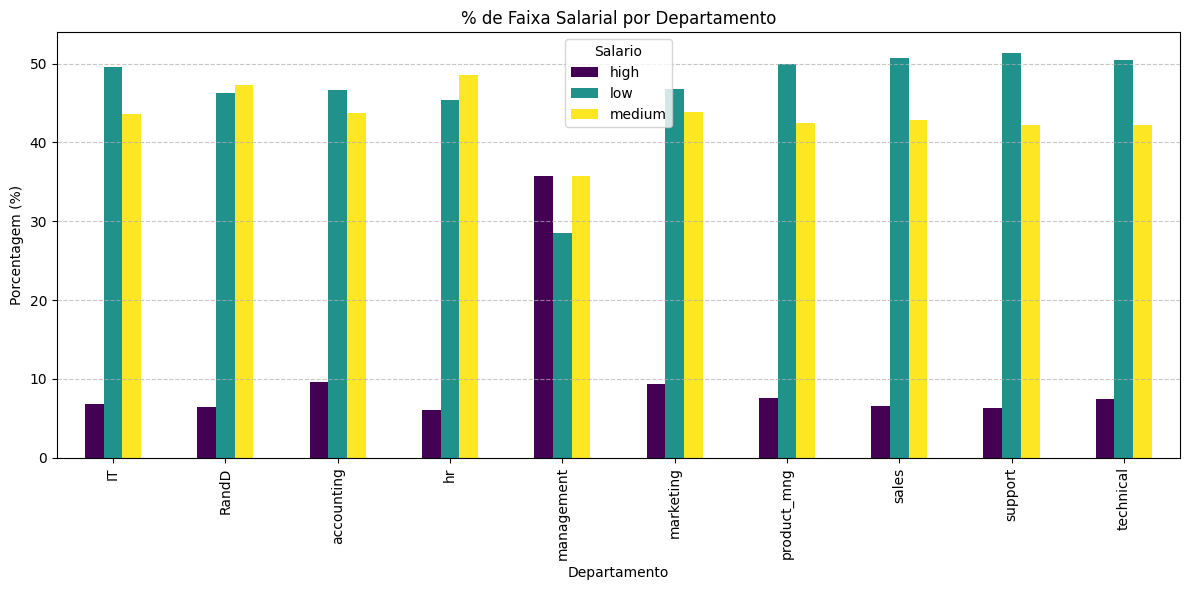

In [16]:
salario_percentual.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('% de Faixa Salarial por Departamento')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Departamento')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
display(table)

,nível_de_satisfação,última_avaliação,número_projeto,média_de_horas_mensais,tempo_de_empresa,Acidente de trabalho,status,promocao_ultimos_cinco_anos,Departamento,Salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
# Filtrar apenas quem saiu da empresa (status == 0)
funcionarios_que_sairam = table[table['status'] == 0]

# 2. Agrupar por departamento e tempo de empresa, e contar quantos saíram em cada grupo
saidas_gerais = funcionarios_que_sairam.groupby(['Departamento', 'tempo_de_empresa']).size().unstack(fill_value=0)

# 3. Exibir a tabela
display(saidas_gerais)

tempo_de_empresa,2,3,4,5,6,7,8,10
Departamento,,,,,,,,
IT,264,408,139,60,45,12,10,16
RandD,179,296,102,42,37,0,10,0
accounting,139,243,99,35,23,0,14,10
hr,162,218,71,39,28,0,6,0
management,113,200,59,27,18,36,24,62
marketing,171,276,103,30,33,10,20,12
product_mng,201,298,108,39,22,18,8,10
sales,878,1290,442,163,137,110,48,58
support,504,732,241,98,61,0,12,26


In [19]:
# Tempo mais comum de saída por departamento
tempo_mais_comum = saidas_gerais.idxmax(axis=1)
display(tempo_mais_comum)


Departamento
IT             3
RandD          3
accounting     3
hr             3
management     3
marketing      3
product_mng    3
sales          3
support        3
technical      3
dtype: int64

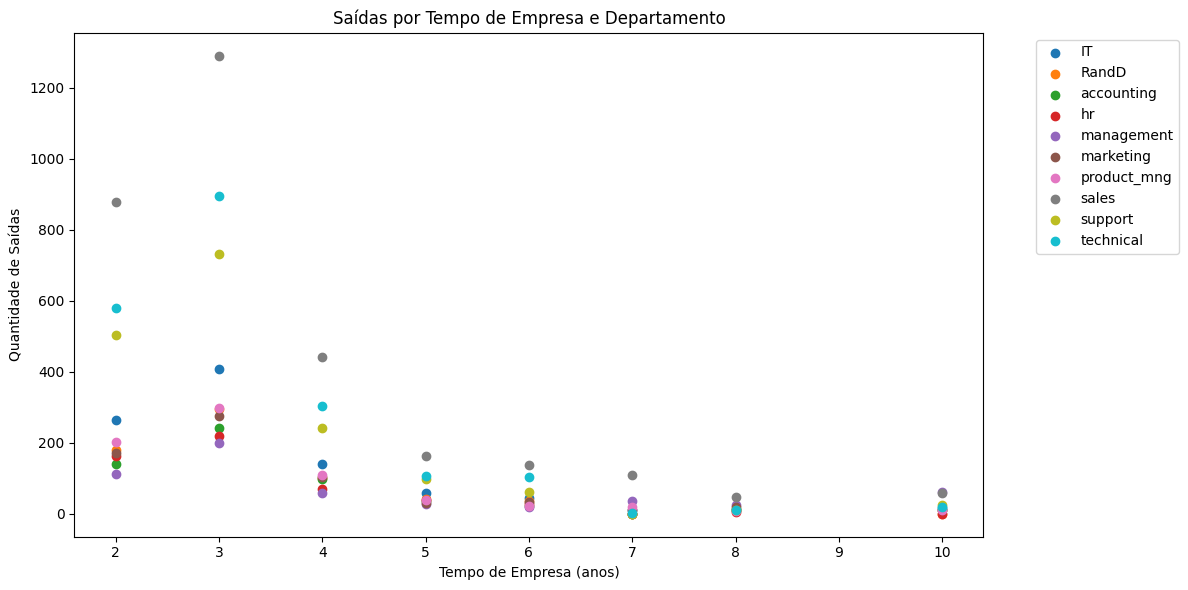

In [20]:
import matplotlib.pyplot as plt

# "Derrete" o DataFrame para formato longo (tidy)
df_disp = saidas_gerais.reset_index().melt(id_vars='Departamento', var_name='tempo_de_empresa', value_name='quantidade')

# Agora sim: plotar dispersão
plt.figure(figsize=(12, 6))

# Usar scatter do matplotlib
for departamento in df_disp['Departamento'].unique():
    dados = df_disp[df_disp['Departamento'] == departamento]
    plt.scatter(dados['tempo_de_empresa'], dados['quantidade'], label=departamento)

# Personalização do gráfico
plt.xlabel('Tempo de Empresa (anos)')
plt.ylabel('Quantidade de Saídas')
plt.title('Saídas por Tempo de Empresa e Departamento')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [21]:
display(table)

,nível_de_satisfação,última_avaliação,número_projeto,média_de_horas_mensais,tempo_de_empresa,Acidente de trabalho,status,promocao_ultimos_cinco_anos,Departamento,Salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
promocao = table.groupby('Departamento')['promocao_ultimos_cinco_anos'].sum()
display(promocao)


Departamento
IT               3
RandD           27
accounting      14
hr              15
management      69
marketing       43
product_mng      0
sales          100
support         20
technical       28
Name: promocao_ultimos_cinco_anos, dtype: int64

In [23]:
contagem = table.groupby('Departamento')['status'].value_counts().unstack().fillna(0)

contagem['%_saida'] = (contagem[0] / (contagem[0] + contagem[1])) * 100

display(contagem[['%_saida']])

status,%_saida
Departamento,
IT,77.750611
RandD,84.625159
accounting,73.402868
hr,70.906631
management,85.555556
marketing,76.340326
product_mng,78.048780
sales,75.507246
support,75.100942


In [24]:
display(table)

,nível_de_satisfação,última_avaliação,número_projeto,média_de_horas_mensais,tempo_de_empresa,Acidente de trabalho,status,promocao_ultimos_cinco_anos,Departamento,Salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [25]:
nvl_acidente = table.groupby(['Departamento', 'Acidente de trabalho']).size().unstack(fill_value=0)
display(nvl_acidente)


# Exato! Você entendeu bem o erro: o .unstack() só funciona 
# quando o índice do seu DataFrame é um MultiIndex — ou seja, quando você agrupou por duas ou mais colunas.

Acidente de trabalho,0,1
Departamento,,
IT,1063,164
RandD,653,134
accounting,671,96
hr,650,89
management,527,103
marketing,720,138
product_mng,770,132
sales,3553,587
support,1884,345


In [26]:
nvl_acidente['%_com_acidente'] = (nvl_acidente[1] / (nvl_acidente[0] + nvl_acidente[1])) * 100
nvl_acidente['%_com_acidente'] = nvl_acidente['%_com_acidente'].round(2)

display(nvl_acidente[['%_com_acidente']])


Acidente de trabalho,%_com_acidente
Departamento,
IT,13.37
RandD,17.03
accounting,12.52
hr,12.04
management,16.35
marketing,16.08
product_mng,14.63
sales,14.18
support,15.48


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem de acidentes por departamento (com e sem acidente)
nvl_acidente = table.groupby(['Departamento', 'Acidente de trabalho']).size().unstack(fill_value=0)

# Cálculo da % de acidentes
nvl_acidente['%_com_acidente'] = (nvl_acidente[1] / (nvl_acidente[0] + nvl_acidente[1])) * 100
nvl_acidente['%_com_acidente'] = nvl_acidente['%_com_acidente'].round(2)

display(nvl_acidente)


Acidente de trabalho,0,1,%_com_acidente
Departamento,,,
IT,1063,164,13.37
RandD,653,134,17.03
accounting,671,96,12.52
hr,650,89,12.04
management,527,103,16.35
marketing,720,138,16.08
product_mng,770,132,14.63
sales,3553,587,14.18
support,1884,345,15.48


In [28]:
# Função para classificar o risco
def classificar_risco(porcentagem):
    if porcentagem < 1:
        return 'Excelente'
    elif porcentagem < 3:
        return 'Aceitável'
    elif porcentagem < 5:
        return 'Atenção'
    else:
        return 'Crítico'

nvl_acidente['Risco'] = nvl_acidente['%_com_acidente'].apply(classificar_risco)
display(nvl_acidente[['%_com_acidente', 'Risco']])


Acidente de trabalho,%_com_acidente,Risco
Departamento,,
IT,13.37,Crítico
RandD,17.03,Crítico
accounting,12.52,Crítico
hr,12.04,Crítico
management,16.35,Crítico
marketing,16.08,Crítico
product_mng,14.63,Crítico
sales,14.18,Crítico
support,15.48,Crítico


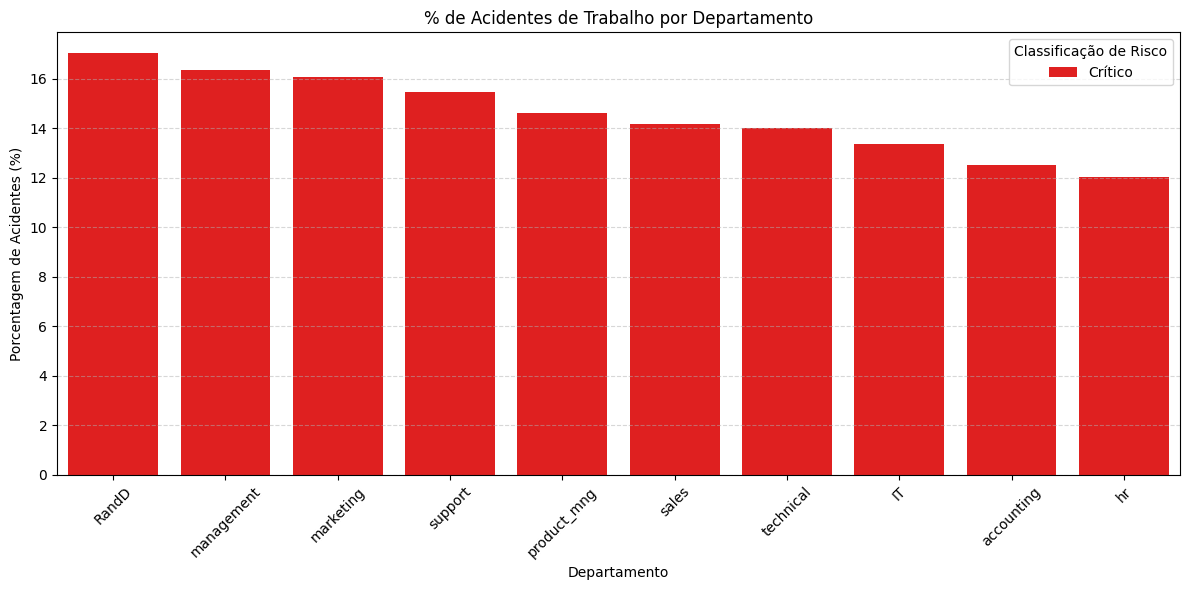

In [29]:
import seaborn as sns

# Ordenar por % de acidente
nvl_acidente_sorted = nvl_acidente.sort_values('%_com_acidente', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=nvl_acidente_sorted.index,
    y=nvl_acidente_sorted['%_com_acidente'],
    hue=nvl_acidente_sorted['Risco'],
    palette={'Excelente': 'green', 'Aceitável': 'yellow', 'Atenção': 'orange', 'Crítico': 'red'}
)

plt.title('% de Acidentes de Trabalho por Departamento')
plt.ylabel('Porcentagem de Acidentes (%)')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.legend(title='Classificação de Risco')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
